In [1]:
#firstly using linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
import random
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [2]:
x=6 * np.random.rand(200, 1) - 3

In [3]:
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

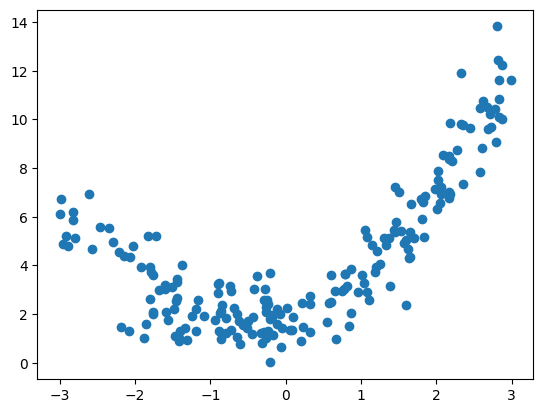

In [4]:
plt.scatter(x,y)

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [6]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [7]:
r2_score(y_test,y_pred)

0.3063990975350481

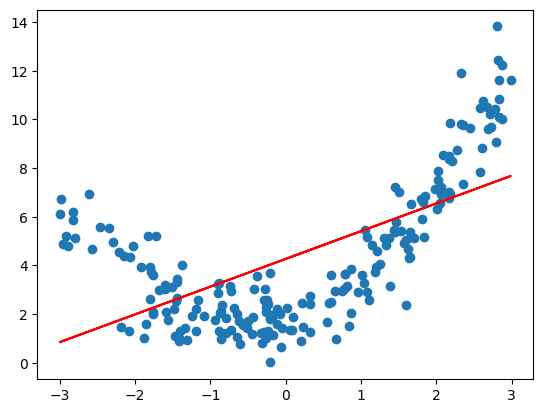

In [8]:
plt.scatter(x,y)
plt.plot(x_train,lr.predict(x_train),color='red')

In [10]:
#applying polynomial regression
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)


In [13]:
print(x_train[0])
print(x_train_trans[0])

[0.09653372]
[1.         0.09653372 0.00931876]


In [14]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)

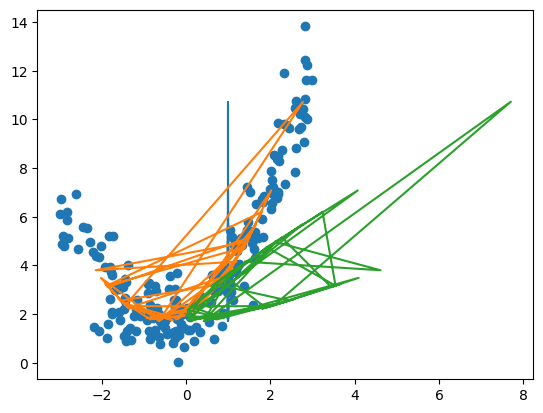

In [21]:
plt.scatter(x,y)
plt.plot(x_test_trans,lr.predict(x_test_trans))

In [18]:
r2_score(y_test,y_pred)

0.8038199802274667

In [19]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89318096 0.81729846]]
[1.95194344]


In [20]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

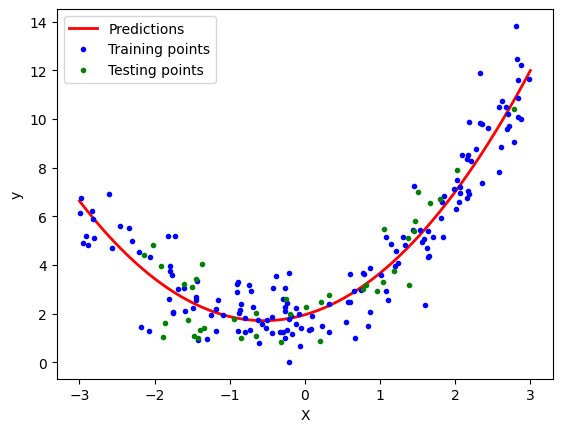

In [22]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()    

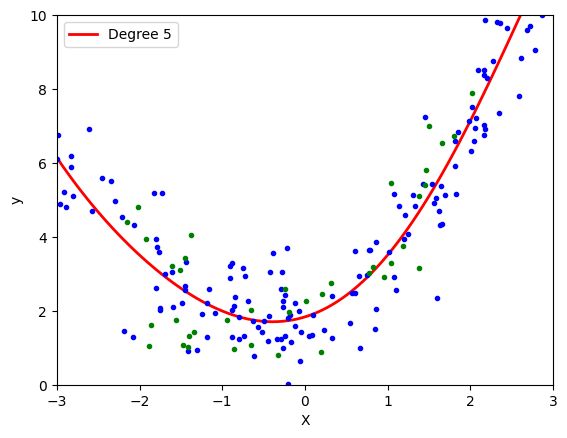

In [29]:
polynomial_regression(5)